# CAPSTONE CODE

#### 1) Import Data
#### 2) Pre-Processing Data
##### Making sure the code is aggregated by the hour
#### 3) EDA
##### Visualizing some of the different workload's metrics

#### 4) LSTM AE Model Builds (Currently have 3 versions)

## 1) IMPORT DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# raw_data = pd.read_csv('C:/Users/Michael/Desktop/Capstone/all_detailed_sorted.csv', sep = ',')
raw_data = pd.read_csv('/Users/mitchellcarmen/Documents/DATA SCIENCE/MScA/Capstone/all_detailed_sorted.csv', sep = ',') 

In [4]:
raw_data.shape

(1481835, 27)

In [5]:
raw_data.head(50)

,SYSTEM_ID,MODELID,RULESET_NAME,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,USERID,CLIENTADDRESS,PROGRAMNAME,ACCOUNTSTRING,...,TOTAL_EXEC_COUNT,ARRIVAL_RATE,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS,NBR_PHYS_BLK_READS,NBR_PHYS_BLKWRITES,TOTAL_DELAY_TIME,CONCURRENCY_LIMIT_VALUE,CPUUTIL_PCT_LIMIT_VALUE
0,1,1526610,1,02-JAN-16,0,Load,INFETLPRD,30.128.140.73,TPUMPEXE,$M2$&D&HLOAD,...,132,0.036667,8.626456,1.645768e-06,0.000000e+00,0,0,0.0,-1.0,1
1,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.047936,9.145244e-09,0.000000e+00,0,0,0.0,-1.0,1
2,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,14.758761,2.815698e-06,5.614010e+04,21223,3021,0.0,10.0,1
3,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.057529,1.100000e-08,0.000000e+00,0,0,0.0,-1.0,1
4,1,1526610,1,02-JAN-16,0,CIIOUT-WEBAPP,SRCCIIPRDWS,30.128.97.133,WIREPORTSERVER,$M1$&D&HCIIOUT,...,1,0.000278,0.019186,3.660378e-09,0.000000e+00,0,0,0.0,-1.0,1
5,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,6,0.001667,0.062281,1.188198e-08,1.157814e+01,5,0,0.0,-1.0,1
6,1,1526610,1,02-JAN-16,0,Load,DX_EDW_ALL_WEBMD_DML,30.130.19.213,BTEQ,$M2$&D&HLOAD,...,1,0.000278,0.004782,9.122438e-10,0.000000e+00,0,0,0.0,-1.0,1
7,1,1526610,1,02-JAN-16,0,Load,SSB_SNRRSK_CMS_MEDCR_DML,30.128.132.138,BTEQ,$M2$&D&HLOAD,...,2,0.000556,5.886709,1.123075e-06,4.647467e+03,1757,250,0.0,10.0,1
8,1,1526610,1,02-JAN-16,0,Load,EDW_CHUB_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,6,0.001667,0.134214,2.560554e-08,4.631257e+00,2,0,0.0,-1.0,1
9,1,1526610,1,02-JAN-16,0,Load,EDW_CHUB_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.062310,1.188768e-08,0.000000e+00,0,0,0.0,-1.0,1


In [6]:
raw_data.tail()

,SYSTEM_ID,MODELID,RULESET_NAME,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,USERID,CLIENTADDRESS,PROGRAMNAME,ACCOUNTSTRING,...,TOTAL_EXEC_COUNT,ARRIVAL_RATE,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS,NBR_PHYS_BLK_READS,NBR_PHYS_BLKWRITES,TOTAL_DELAY_TIME,CONCURRENCY_LIMIT_VALUE,CPUUTIL_PCT_LIMIT_VALUE
1481830,1,1549235,161,20-JAN-16,23,DEVLPR,AD83516,30.130.16.130,QUERYMAN,$M2$&D&HDEVLPR,...,1,0.000278,0.039138,7.466888e-09,0.000000,0,0,0.0,-1.0,1
1481831,1,1549235,161,20-JAN-16,23,USER,AC98202,208.78.177.104,SQLA,$M1$&D&HUSER,...,3,0.000833,0.426699,8.140616e-08,0.000000,0,0,0.0,-1.0,1
1481832,1,1549235,161,20-JAN-16,23,MedicaidLd,SSB_WGS_CLM_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.060918,1.162206e-08,0.000000,0,0,0.0,-1.0,1
1481833,1,1549235,161,20-JAN-16,23,EDWOthLd,PYMNT_INNVTN_SS_DML,30.128.128.22,BTEQ,$M2$&D&HLOADVIP,...,12,0.003333,0.117442,2.240584e-08,12.945731,6,0,0.0,-1.0,1
1481834,1,1549235,161,20-JAN-16,23,DEVLPR,AC98927,30.138.145.211,SQLA,$M2$&D&HDEVLPR,...,1,0.000278,0.039138,7.466888e-09,0.000000,0,0,0.0,-1.0,1


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481835 entries, 0 to 1481834
Data columns (total 27 columns):
SYSTEM_ID                    1481835 non-null int64
MODELID                      1481835 non-null int64
RULESET_NAME                 1481835 non-null int64
DATE_GMT                     1481835 non-null object
HOUR_GMT                     1481835 non-null int64
WORKLOAD_NAME                1481835 non-null object
USERID                       1481835 non-null object
CLIENTADDRESS                1481835 non-null object
PROGRAMNAME                  1481835 non-null object
ACCOUNTSTRING                1481835 non-null object
EXTERNALWORKLOADNAME         1154139 non-null object
AVGPRIORITY                  1481835 non-null float64
AVG_NBR_PARALLEL_SESSIONS    1481835 non-null float64
AVG_REQUEST_PARALLELISM      1481835 non-null float64
NBR_INTERCONNECT_MSGS        1481835 non-null int64
NBR_INTERCONNECT_BLKS        1481835 non-null int64
TOTAL_RESP_TIME              1481835 non-n

## 2) PRE-PROCESSING

### DROP FIELDS WE DONT NEED: Only keep dependent variables

In [8]:
# Print all columns names
print(list(raw_data.columns))

['SYSTEM_ID', 'MODELID', 'RULESET_NAME', 'DATE_GMT', 'HOUR_GMT', 'WORKLOAD_NAME', 'USERID', 'CLIENTADDRESS', 'PROGRAMNAME', 'ACCOUNTSTRING', 'EXTERNALWORKLOADNAME', 'AVGPRIORITY', 'AVG_NBR_PARALLEL_SESSIONS', 'AVG_REQUEST_PARALLELISM', 'NBR_INTERCONNECT_MSGS', 'NBR_INTERCONNECT_BLKS', 'TOTAL_RESP_TIME', 'TOTAL_EXEC_COUNT', 'ARRIVAL_RATE', 'TOTAL_CPU_TIME', 'CPU_UTIL_PCT', 'TOTAL_IO_OPS', 'NBR_PHYS_BLK_READS', 'NBR_PHYS_BLKWRITES', 'TOTAL_DELAY_TIME', 'CONCURRENCY_LIMIT_VALUE', 'CPUUTIL_PCT_LIMIT_VALUE']


In [9]:
good_fields = ['DATE_GMT','HOUR_GMT','WORKLOAD_NAME','TOTAL_EXEC_COUNT','TOTAL_CPU_TIME','CPU_UTIL_PCT','TOTAL_IO_OPS']
data = raw_data[good_fields]

In [10]:
data.shape

(1481835, 7)

In [11]:
data.head(20)

,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
0,02-JAN-16,0,Load,132,8.626456,1.645768e-06,0.000000e+00
1,02-JAN-16,0,EDWARDLOAD,2,0.047936,9.145244e-09,0.000000e+00
2,02-JAN-16,0,EDWARDLOAD,2,14.758761,2.815698e-06,5.614010e+04
3,02-JAN-16,0,EDWARDLOAD,2,0.057529,1.100000e-08,0.000000e+00
4,02-JAN-16,0,CIIOUT-WEBAPP,1,0.019186,3.660378e-09,0.000000e+00
5,02-JAN-16,0,EDWARDLOAD,6,0.062281,1.188198e-08,1.157814e+01
6,02-JAN-16,0,Load,1,0.004782,9.122438e-10,0.000000e+00
7,02-JAN-16,0,Load,2,5.886709,1.123075e-06,4.647467e+03
8,02-JAN-16,0,Load,6,0.134214,2.560554e-08,4.631257e+00
9,02-JAN-16,0,Load,2,0.062310,1.188768e-08,0.000000e+00


### Fix variable types, missing values, data/time...

In [12]:
# Create categories for WORKLOADs
data['WORKLOAD_NAME'] = data['WORKLOAD_NAME'].astype('category')
data.info()

/Users/mitchellcarmen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481835 entries, 0 to 1481834
Data columns (total 7 columns):
DATE_GMT            1481835 non-null object
HOUR_GMT            1481835 non-null int64
WORKLOAD_NAME       1481835 non-null category
TOTAL_EXEC_COUNT    1481835 non-null int64
TOTAL_CPU_TIME      1481835 non-null float64
CPU_UTIL_PCT        1481835 non-null float64
TOTAL_IO_OPS        1481835 non-null float64
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 69.2+ MB


In [13]:
# Missing Values = NONE! Yay.
print(data.isnull().sum())

DATE_GMT            0
HOUR_GMT            0
WORKLOAD_NAME       0
TOTAL_EXEC_COUNT    0
TOTAL_CPU_TIME      0
CPU_UTIL_PCT        0
TOTAL_IO_OPS        0
dtype: int64


In [14]:
# Fix DATE & TIME
from datetime import timedelta
from datetime import *

In [15]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_GMT'].astype(str) +' '+data['HOUR_GMT'].astype(str), format = '%d-%b-%y %H')
data.head()

/Users/mitchellcarmen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS,DATE_TIME
0,02-JAN-16,0,Load,132,8.626456,1.645768e-06,0.00000,2016-01-02
1,02-JAN-16,0,EDWARDLOAD,2,0.047936,9.145244e-09,0.00000,2016-01-02
2,02-JAN-16,0,EDWARDLOAD,2,14.758761,2.815698e-06,56140.10011,2016-01-02
3,02-JAN-16,0,EDWARDLOAD,2,0.057529,1.100000e-08,0.00000,2016-01-02
4,02-JAN-16,0,CIIOUT-WEBAPP,1,0.019186,3.660378e-09,0.00000,2016-01-02


In [16]:
data = data.drop(columns = ['DATE_GMT','HOUR_GMT'])
data = data[['DATE_TIME','WORKLOAD_NAME','TOTAL_EXEC_COUNT','TOTAL_CPU_TIME','CPU_UTIL_PCT','TOTAL_IO_OPS']]

In [17]:
data.head()

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
0,2016-01-02,Load,132,8.626456,1.645768e-06,0.00000
1,2016-01-02,EDWARDLOAD,2,0.047936,9.145244e-09,0.00000
2,2016-01-02,EDWARDLOAD,2,14.758761,2.815698e-06,56140.10011
3,2016-01-02,EDWARDLOAD,2,0.057529,1.100000e-08,0.00000
4,2016-01-02,CIIOUT-WEBAPP,1,0.019186,3.660378e-09,0.00000


## EDA

In [18]:
# What are the highest frequency counts of WORKLOADS?
data['WORKLOAD_NAME'].value_counts(dropna=False).head(66) # showing only the head

EDWOthLd          309664
Load              190283
USER              174273
LOAD              158342
EDWARDLOAD        118472
DEVLPR             94461
DBA                91616
CIIOUT-WEBAPP      54708
CLMLd              29585
MbrshpLd           26827
Other Activity     20218
DATAEXCHG          19343
OUTOther           17766
MedicaidLd         13129
OUT                12411
RIA                11464
CISLd              10989
CIIOUT-BATCH       10242
PROVLd              9764
MCPLd               9662
STARLd              9000
PRC                 8913
COALd               8707
PharmLd             8624
3rdPTYLd            8280
Unknown             7722
SYS_STATS           7102
PRODLd              6730
HR                  6331
RDSLd               3536
                   ...  
EDMLd               1474
APPL                1083
CAPNLd              1041
EDWHstLd             897
HELPDESK             659
CIILd                558
CIIld                558
CIS                  542
APPLDEV              334


### There are 66 unique Workloads with varying amount of data in each Workload

### We need to separate out for a Workload with lots of data.
### Let's work with EDWOthLd first as it has many observations.

#### EDWOthLd WORKLOAD

In [71]:
df = data[data.WORKLOAD_NAME == 'EDWOthLd']
df.head(10)

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
728,2016-01-02,EDWOthLd,2,12.071342,2.303000e-06,1.021887e+04
729,2016-01-02,EDWOthLd,1,2.784904,5.313079e-07,2.537929e+03
732,2016-01-02,EDWOthLd,3,2802.406833,5.346472e-04,9.645265e+05
733,2016-01-02,EDWOthLd,8,11.977085,2.285000e-06,1.068663e+04
737,2016-01-02,EDWOthLd,93,3166.335666,6.040781e-04,6.312140e+06
740,2016-01-02,EDWOthLd,5,0.182150,3.475079e-08,4.631257e+00
741,2016-01-02,EDWOthLd,22,2239.775233,4.273075e-04,4.305495e+05
742,2016-01-02,EDWOthLd,26,68.201642,1.301161e-05,3.018422e+04
743,2016-01-02,EDWOthLd,2,0.038343,7.315055e-09,0.000000e+00
745,2016-01-02,EDWOthLd,34,69.070402,1.317735e-05,8.376323e+04


In [20]:
df.tail(10)

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
1481799,2016-01-20 23:00:00,EDWOthLd,19,34.110901,6.507727e-06,41217.049439
1481800,2016-01-20 23:00:00,EDWOthLd,2,0.091350,1.742791e-08,28.049084
1481808,2016-01-20 23:00:00,EDWOthLd,9,148.185272,2.827100e-05,249084.492249
1481813,2016-01-20 23:00:00,EDWOthLd,2,0.052212,1.000000e-08,0.000000
1481815,2016-01-20 23:00:00,EDWOthLd,2,0.021753,4.149996e-09,0.000000
1481818,2016-01-20 23:00:00,EDWOthLd,11,0.004340,8.279294e-10,0.000000
1481825,2016-01-20 23:00:00,EDWOthLd,1,1.480317,2.824171e-07,422.893875
1481827,2016-01-20 23:00:00,EDWOthLd,21,0.217526,4.149996e-08,0.000000
1481829,2016-01-20 23:00:00,EDWOthLd,2,0.056551,1.078895e-08,0.000000
1481833,2016-01-20 23:00:00,EDWOthLd,12,0.117442,2.240584e-08,12.945731


In [21]:
df.shape

(309664, 6)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309664 entries, 728 to 1481833
Data columns (total 6 columns):
DATE_TIME           309664 non-null datetime64[ns]
WORKLOAD_NAME       309664 non-null category
TOTAL_EXEC_COUNT    309664 non-null int64
TOTAL_CPU_TIME      309664 non-null float64
CPU_UTIL_PCT        309664 non-null float64
TOTAL_IO_OPS        309664 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 14.5 MB


In [23]:
df.describe()

,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
count,3.096640e+05,3.096640e+05,3.096640e+05,3.096640e+05
mean,2.572624e+02,1.399104e+03,2.669231e-04,1.353259e+06
std,1.178025e+04,1.262676e+04,2.408952e-03,1.329212e+07
min,1.000000e+00,9.975766e-05,1.903191e-11,0.000000e+00
25%,2.000000e+00,6.589360e-02,1.257128e-08,0.000000e+00
50%,4.000000e+00,2.009376e+00,3.833517e-07,5.903199e+02
75%,1.100000e+01,1.367568e+02,2.609066e-05,1.871840e+05
max,2.276686e+06,1.090649e+06,2.080756e-01,1.420852e+09


### Let's aggregate the EDWOthLd WL down to averages by day/hour

In [83]:
df.head(50)

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
728,2016-01-02,EDWOthLd,2,12.071342,2.303000e-06,1.021887e+04
729,2016-01-02,EDWOthLd,1,2.784904,5.313079e-07,2.537929e+03
732,2016-01-02,EDWOthLd,3,2802.406833,5.346472e-04,9.645265e+05
733,2016-01-02,EDWOthLd,8,11.977085,2.285000e-06,1.068663e+04
737,2016-01-02,EDWOthLd,93,3166.335666,6.040781e-04,6.312140e+06
740,2016-01-02,EDWOthLd,5,0.182150,3.475079e-08,4.631257e+00
741,2016-01-02,EDWOthLd,22,2239.775233,4.273075e-04,4.305495e+05
742,2016-01-02,EDWOthLd,26,68.201642,1.301161e-05,3.018422e+04
743,2016-01-02,EDWOthLd,2,0.038343,7.315055e-09,0.000000e+00
745,2016-01-02,EDWOthLd,34,69.070402,1.317735e-05,8.376323e+04


In [84]:
# VERSION 1: Let's look at EDWOthLd by the correct aggregation
df_grouped = df.groupby(['DATE_TIME']).mean()
df_grouped.columns = ['AVG_EXEC_COUNT','AVG_CPU_TIME','AVG_CPU_UTIL','AVG_IO_OPS']
df_grouped.head(30)

,AVG_EXEC_COUNT,AVG_CPU_TIME,AVG_CPU_UTIL,AVG_IO_OPS
DATE_TIME,,,,
2016-01-02 00:00:00,888.157480,635.068047,0.000121,5.676721e+05
2016-01-02 01:00:00,892.357937,1573.456138,0.000300,2.155748e+06
2016-01-02 02:00:00,432.300501,1929.271206,0.000368,1.844556e+06
2016-01-02 03:00:00,382.474409,1894.740471,0.000361,2.956156e+06
2016-01-02 04:00:00,166.388193,294.295163,0.000056,3.822958e+05
2016-01-02 05:00:00,427.629596,435.236522,0.000083,3.653723e+05
2016-01-02 06:00:00,225.610197,419.210743,0.000080,2.283159e+05
2016-01-02 07:00:00,209.338235,604.453404,0.000115,3.986077e+05
2016-01-02 08:00:00,513.027273,734.751157,0.000140,8.380717e+05


In [85]:
# VERSION 2: Let's look at EDWARDLOAD by the correct aggregation
df_PIVOT = df.pivot_table(index=["DATE_TIME"],
                                            values=["TOTAL_EXEC_COUNT","TOTAL_CPU_TIME","CPU_UTIL_PCT","TOTAL_IO_OPS"],
                                            aggfunc=np.mean)
df_PIVOT.columns = ['AVG_CPU_UTIL','AVG_CPU_TIME','AVG_EXEC_COUNT','AVG_IO_OPS']
df_PIVOT.head(30)

,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
DATE_TIME,,,,
2016-01-02 00:00:00,0.000121,635.068047,888.157480,5.676721e+05
2016-01-02 01:00:00,0.000300,1573.456138,892.357937,2.155748e+06
2016-01-02 02:00:00,0.000368,1929.271206,432.300501,1.844556e+06
2016-01-02 03:00:00,0.000361,1894.740471,382.474409,2.956156e+06
2016-01-02 04:00:00,0.000056,294.295163,166.388193,3.822958e+05
2016-01-02 05:00:00,0.000083,435.236522,427.629596,3.653723e+05
2016-01-02 06:00:00,0.000080,419.210743,225.610197,2.283159e+05
2016-01-02 07:00:00,0.000115,604.453404,209.338235,3.986077e+05
2016-01-02 08:00:00,0.000140,734.751157,513.027273,8.380717e+05


In [86]:
df_PIVOT.shape

(321, 4)

In [87]:
# We need to rest the index as indeces are lost as variables afterg the pivot/groupBy
df_PIVOT = df_PIVOT.reset_index()
df_PIVOT.head(30)

,DATE_TIME,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
0,2016-01-02 00:00:00,0.000121,635.068047,888.157480,5.676721e+05
1,2016-01-02 01:00:00,0.000300,1573.456138,892.357937,2.155748e+06
2,2016-01-02 02:00:00,0.000368,1929.271206,432.300501,1.844556e+06
3,2016-01-02 03:00:00,0.000361,1894.740471,382.474409,2.956156e+06
4,2016-01-02 04:00:00,0.000056,294.295163,166.388193,3.822958e+05
5,2016-01-02 05:00:00,0.000083,435.236522,427.629596,3.653723e+05
6,2016-01-02 06:00:00,0.000080,419.210743,225.610197,2.283159e+05
7,2016-01-02 07:00:00,0.000115,604.453404,209.338235,3.986077e+05
8,2016-01-02 08:00:00,0.000140,734.751157,513.027273,8.380717e+05
9,2016-01-02 09:00:00,0.000120,628.414349,33.714072,7.325231e+05


### PLOT COMPARISONS OF TOTAL vs Aggregated AVG

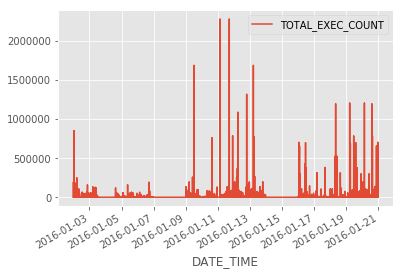

In [88]:
# RAW EXECUTED
y_col = 'TOTAL_EXEC_COUNT'
df.plot(x='DATE_TIME', y=y_col)

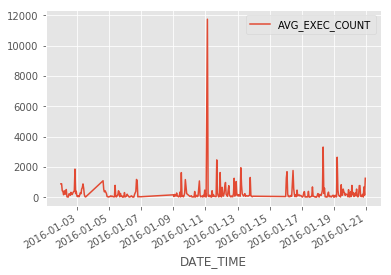

In [89]:
# AGGREGATED EXECUTED
y_col = 'AVG_EXEC_COUNT'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

In [90]:
df_PIVOT.AVG_EXEC_COUNT.head()

0    888.157480
1    892.357937
2    432.300501
3    382.474409
4    166.388193
Name: AVG_EXEC_COUNT, dtype: float64

### Let's add a moving average in and see what that looks like...

In [91]:
mva = df_PIVOT.AVG_EXEC_COUNT.rolling(window=2).mean()
mva.head()

0           NaN
1    890.257709
2    662.329219
3    407.387455
4    274.431301
Name: AVG_EXEC_COUNT, dtype: float64

In [92]:
mva[1:]

1       890.257709
2       662.329219
3       407.387455
4       274.431301
5       297.008894
6       326.619896
7       217.474216
8       361.182754
9       273.370672
10       27.364045
11       19.639860
12      121.873436
13      223.591379
14      175.520754
15      226.835345
16      255.996673
17      187.236218
18      246.153157
19      338.813162
20      379.774026
21     1122.614354
22     1048.686817
23      316.969497
24      231.767420
25       58.102988
26       70.400096
27       63.662203
28       87.093157
29      218.708581
30      267.379738
          ...     
291     207.533602
292     165.796187
293     193.163158
294     105.815995
295     268.491403
296     264.862328
297      29.869455
298     193.804519
299     203.031942
300     415.245495
301     471.967866
302     237.178750
303     178.960920
304      65.434073
305     186.908605
306     198.060658
307     324.147406
308     308.605224
309      51.051886
310      71.027467
311     441.525787
312     770.

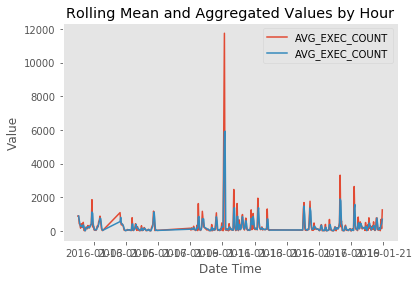

In [93]:
# ROLLING MEAN
y_col = mva
y_col2 = df_PIVOT.AVG_EXEC_COUNT
x_col = df_PIVOT.DATE_TIME
fig, ax = plt.subplots()
ax.plot(x_col, y_col2)
ax.plot(x_col, y_col)
ax.legend()
ax.set(xlabel='Date Time', ylabel='Value',
       title='Rolling Mean and Aggregated Values by Hour')
ax.grid()

In [110]:
import statistics
diffs = df_PIVOT.AVG_EXEC_COUNT[1:] - mva[1:] # Start at 1 as we have a 2 window moving avg
print(diffs.mean())
print(diffs.std())

0.5679787269236204
536.8450579221509


In [96]:
diffs_table = pd.DataFrame()
diffs_table['AVG_Exec_Count'] = df_PIVOT.AVG_EXEC_COUNT[1:]
diffs_table['Moving_AVG'] = mva[1:]
diffs_table['Diffs'] = diffs
diffs_table.head(50)

,AVG_Exec_Count,Moving_AVG,Diffs
1,892.357937,890.257709,2.100228
2,432.300501,662.329219,-230.028718
3,382.474409,407.387455,-24.913046
4,166.388193,274.431301,-108.043108
5,427.629596,297.008894,130.620701
6,225.610197,326.619896,-101.009699
7,209.338235,217.474216,-8.135981
8,513.027273,361.182754,151.844519
9,33.714072,273.370672,-239.656600
10,21.014019,27.364045,-6.350027


### Plotting ABS(Erros) from the Moving AVG

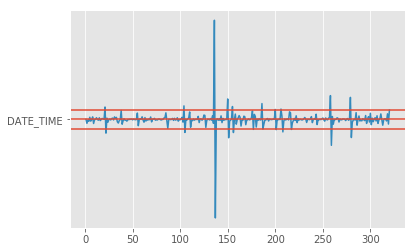

In [114]:
plt.plot('DATE_TIME')
plt.plot(diffs)
plt.axhline(y=diffs.std())
plt.axhline(y=-diffs.std())
plt.axhline(y=diffs.mean())
plt.show()

# FOR MANUAL IDENTIFICATION OF ANOMALIES, PERAHPS WE USE THE ABOVE TO LOOK AT HOW BIG THE ERRORS ARE FROM THE MOVING AVERAGE?

### Other plots of Raw vs Aggregated-- Same Workload

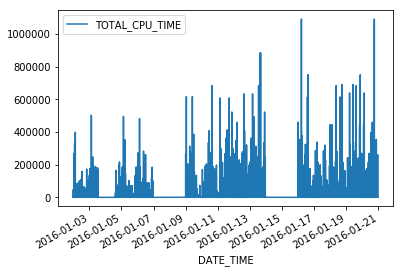

In [37]:
# RAW CPU TIME
y_col = 'TOTAL_CPU_TIME'
df.plot(x='DATE_TIME', y=y_col)

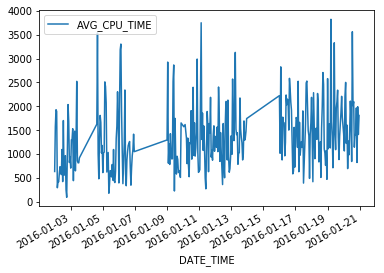

In [38]:
# AGGREGATED CPU TIME
y_col = 'AVG_CPU_TIME'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

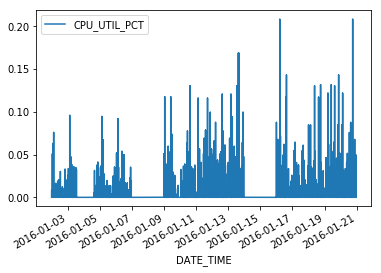

In [39]:
# RAW CPU UTIL
y_col = 'CPU_UTIL_PCT'
df.plot(x='DATE_TIME', y=y_col)

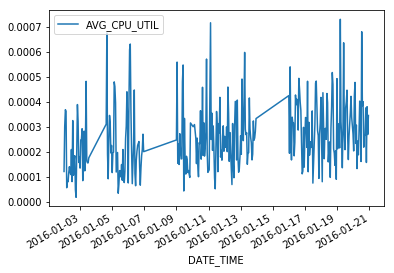

In [40]:
# AGGREGATED CPU UTIL
y_col = 'AVG_CPU_UTIL'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

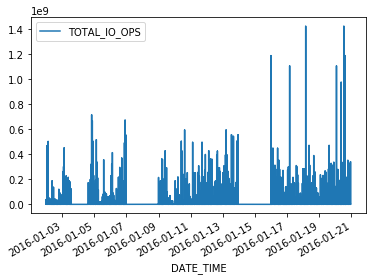

In [41]:
# RAW IO
y_col = 'TOTAL_IO_OPS'
df.plot(x='DATE_TIME', y=y_col)

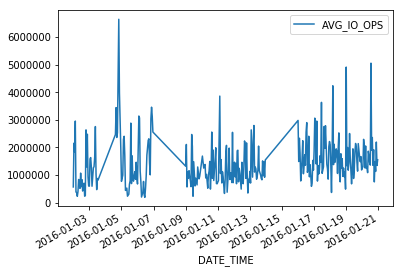

In [42]:
# AGGREGATED IO
y_col = 'AVG_IO_OPS'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

# 4) LSTM AUTOENCODER Models - 4 versions

### Using https://machinelearningmastery.com/lstm-autoencoders/ as a framework.

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import tensorflow as tf
import seaborn as sns

Using TensorFlow backend.


In [44]:
df_PIVOT.head()

,DATE_TIME,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
0,2016-01-02 00:00:00,0.000121,635.068047,888.157480,5.676721e+05
1,2016-01-02 01:00:00,0.000300,1573.456138,892.357937,2.155748e+06
2,2016-01-02 02:00:00,0.000368,1929.271206,432.300501,1.844556e+06
3,2016-01-02 03:00:00,0.000361,1894.740471,382.474409,2.956156e+06
4,2016-01-02 04:00:00,0.000056,294.295163,166.388193,3.822958e+05


In [45]:
data_avg_cpu_util = df_PIVOT.drop(['DATE_TIME','AVG_CPU_TIME','AVG_EXEC_COUNT','AVG_IO_OPS'], axis=1)

In [46]:
data_avg_cpu_util['scaled'] = StandardScaler().fit_transform(data_avg_cpu_util['AVG_CPU_UTIL'].values.reshape(-1,1))

In [47]:
data_avg_cpu_util.describe()

,AVG_CPU_UTIL,scaled
count,321.000000,3.210000e+02
mean,0.000260,4.046607e-17
std,0.000131,1.001561e+00
min,0.000018,-1.853864e+00
25%,0.000167,-7.103615e-01
50%,0.000244,-1.186967e-01
75%,0.000323,4.849437e-01
max,0.000729,3.596577e+00


In [51]:
sample_data = data_avg_cpu_util.scaled[:100]

In [52]:
# reshape input into samples, timesteps, features
from numpy import array
#sequence = data_avg_cpu_util.scaled
sequence = sample_data
n_in = len(sequence)
sequence = np.array(sequence).reshape((1, n_in, 1))
print(n_in)
print(sequence.shape)

100
(1, 100, 1)


In [53]:
sample_data[:100]

0    -1.062623
1     0.308634
2     0.828583
3     0.778123
4    -1.560590
5    -1.354634
6    -1.378052
7    -1.107359
8    -0.916957
9    -1.072345
10   -1.157571
11   -0.389700
12   -1.372370
13    0.496604
14   -1.176546
15   -0.755324
16   -0.581122
17   -1.626962
18   -1.853864
19   -0.445242
20    0.986289
21    0.472496
22   -0.787302
23   -0.626155
24   -0.958956
25   -0.094568
26   -0.075238
27    0.246269
28   -1.343801
29   -0.011089
        ...   
70   -1.413838
71    1.000987
72    2.666184
73    2.838850
74    0.807907
75   -0.440326
76   -1.435736
77   -0.208611
78    1.432447
79   -1.130084
80   -1.498846
81   -0.719387
82   -0.445239
83   -0.263017
84   -0.145219
85   -0.916521
86   -1.481419
87   -0.945025
88   -0.572859
89   -0.389474
90    0.079629
91   -0.455486
92   -0.097723
93    2.286456
94   -0.809465
95   -0.219016
96   -0.847919
97    0.094029
98   -0.417529
99   -0.678000
Name: scaled, Length: 100, dtype: float64

In [57]:
# define model
model = Sequential()
model.add(LSTM(32, activation = 'relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(32, activation = 'relu', return_sequences = True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss = 'mse')

In [58]:
# fit model
model.fit(sequence, sequence, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.1489
Epoch 2/50
1/1 [==============================] - 0s 467ms/step - loss: 1.1447
Epoch 3/50
1/1 [==============================] - 0s 449ms/step - loss: 1.1396
Epoch 4/50
1/1 [==============================] - 0s 453ms/step - loss: 1.1336
Epoch 5/50
1/1 [==============================] - 0s 449ms/step - loss: 1.1276
Epoch 6/50
1/1 [==============================] - 1s 518ms/step - loss: 1.1216
Epoch 7/50
1/1 [==============================] - 1s 505ms/step - loss: 1.1157
Epoch 8/50
1/1 [==============================] - 1s 537ms/step - loss: 1.1098
Epoch 9/50
1/1 [==============================] - 0s 493ms/step - loss: 1.1041
Epoch 10/50
1/1 [==============================] - 1s 594ms/step - loss: 1.0986
Epoch 11/50
1/1 [==============================] - 0s 492ms/step - loss: 1.0933
Epoch 12/50
1/1 [==============================] - 1s 546ms/step - loss: 1.0881
Epoch 13/50
1/1 [==============================] - 0

In [68]:
# get the feature vector for the input sequence
sample_data = data_avg_cpu_util.scaled
yhat = model.predict(sequence)
print(yhat.shape)
print(yhat[0,:,0])

(1, 100, 1)
[-0.09342134 -0.15094084 -0.19758268 -0.23447822 -0.26298627 -0.28451207
 -0.30038822 -0.3118076  -0.31979358 -0.32519475 -0.32869485 -0.33083114
 -0.33201587 -0.33255833 -0.3326852  -0.33255854 -0.3322911  -0.33195883
 -0.33161065 -0.3312765  -0.33097276 -0.3307071  -0.33048135 -0.33029386
 -0.33014122 -0.3300189  -0.3299224  -0.32984725 -0.32978937 -0.32974544
 -0.3297124  -0.32968786 -0.3296698  -0.32965666 -0.32964724 -0.32964054
 -0.32963586 -0.32963264 -0.3296304  -0.32962897 -0.32962802 -0.32962742
 -0.32962707 -0.32962683 -0.32962674 -0.3296267  -0.3296267  -0.3296267
 -0.3296267  -0.32962677 -0.32962677 -0.32962683 -0.3296269  -0.3296269
 -0.3296269  -0.32962692 -0.32962692 -0.32962692 -0.32962695 -0.32962692
 -0.32962692 -0.32962692 -0.32962692 -0.32962692 -0.32962692 -0.32962692
 -0.32962692 -0.32962692 -0.32962692 -0.32962692 -0.32962692 -0.32962692
 -0.32962692 -0.32962692 -0.32962692 -0.32962692 -0.32962692 -0.32962692
 -0.32962692 -0.32962692 -0.32962692 -0.3

In [60]:
reconstruction_error = sample_data - yhat[0,:,0]

In [61]:
reconstruction_error

0    -0.969201
1     0.459575
2     1.026165
3     1.012602
4    -1.297604
5    -1.070122
6    -1.077664
7    -0.795552
8    -0.597163
9    -0.747151
10   -0.828876
11   -0.058869
12   -1.040354
13    0.829163
14   -0.843860
15   -0.422765
16   -0.248831
17   -1.295004
18   -1.522254
19   -0.113966
20    1.317262
21    0.803203
22   -0.456820
23   -0.295861
24   -0.628814
25    0.235451
26    0.254684
27    0.576116
28   -1.014012
29    0.318656
        ...   
70   -1.084211
71    1.330614
72    2.995811
73    3.168477
74    1.137534
75   -0.110699
76   -1.106109
77    0.121016
78    1.762074
79   -0.800457
80   -1.169219
81   -0.389760
82   -0.115613
83    0.066610
84    0.184408
85   -0.586894
86   -1.151792
87   -0.615398
88   -0.243232
89   -0.059847
90    0.409256
91   -0.125860
92    0.231904
93    2.616083
94   -0.479838
95    0.110611
96   -0.518292
97    0.423656
98   -0.087902
99   -0.348373
Name: scaled, Length: 100, dtype: float64

### Plot the actual, predictions, and the reconstruction error

In [62]:
reconstruct_dat = pd.DataFrame()
reconstruct_dat['sample_data'] = sample_data
reconstruct_dat['predictions'] = yhat[0,:,0]
reconstruct_dat['reconstruct_error'] = reconstruction_error
reconstruct_dat.head(50)

,sample_data,predictions,reconstruct_error
0,-1.062623,-0.093421,-0.969201
1,0.308634,-0.150941,0.459575
2,0.828583,-0.197583,1.026165
3,0.778123,-0.234478,1.012602
4,-1.560590,-0.262986,-1.297604
5,-1.354634,-0.284512,-1.070122
6,-1.378052,-0.300388,-1.077664
7,-1.107359,-0.311808,-0.795552
8,-0.916957,-0.319794,-0.597163
9,-1.072345,-0.325195,-0.747151


In [63]:
reconstruct_dat.tail(50)

,sample_data,predictions,reconstruct_error
50,1.680247,-0.329627,2.009873
51,1.537182,-0.329627,1.866808
52,1.034181,-0.329627,1.363808
53,-1.079431,-0.329627,-0.749804
54,-0.481014,-0.329627,-0.151387
55,-1.728452,-0.329627,-1.398825
56,-1.451421,-0.329627,-1.121794
57,-1.035451,-0.329627,-0.705824
58,-1.045982,-0.329627,-0.716355
59,-1.228516,-0.329627,-0.898889


In [64]:
np.mean(reconstruct_dat.reconstruct_error)

-0.0012218824717568398

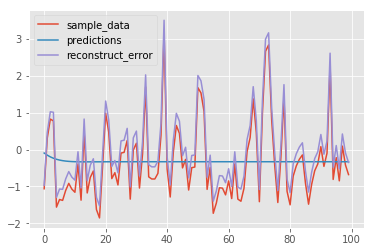

In [70]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(reconstruct_dat.sample_data)
plt.plot(reconstruct_dat.predictions)
plt.plot(reconstruct_dat.reconstruct_error)
plt.legend(loc='upper left')

plt.show()

In [1]:
### MIGHT NEED TO USE SUMS INSTEAD OF AVG'S

### Zia

RMSE: 1.014


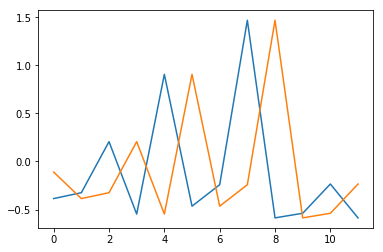

In [55]:
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = data_avg_cpu_util['scaled']
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [56]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# load dataset
series = data_avg_cpu_util['scaled']
# transform to supervised learning
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

          0         0
0  0.000000  0.044254
1  0.044254 -0.192245
2 -0.192245 -0.360683
3 -0.360683 -0.269090
4 -0.269090 -0.495219


In [57]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = data_avg_cpu_util['scaled']
print(series.head())
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0    0.044254
1   -0.192245
2   -0.360683
3   -0.269090
4   -0.495219
Name: scaled, dtype: float64
0   -0.840944
1   -0.892686
2   -0.929538
3   -0.909499
4   -0.958973
dtype: float64
0    0.044254
1   -0.192245
2   -0.360683
3   -0.269090
4   -0.495219
dtype: float64


In [58]:
X, y = train, test
X = X.reshape(X.shape[0], 1, X.shape[1])

IndexError: tuple index out of range

### Skouras

In [59]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Data

In [60]:
df_PIVOT.head()

,DATE_TIME,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
0,2016-01-02 00:00:00,0.000234,1227.465476,29.605536,1.403489e+06
1,2016-01-02 01:00:00,0.000162,849.243304,76.548287,2.575598e+06
2,2016-01-02 02:00:00,0.000111,579.867546,34.446387,7.194693e+05
3,2016-01-02 03:00:00,0.000139,726.349061,183.689189,2.041642e+06
4,2016-01-02 04:00:00,0.000070,364.709884,12.345277,5.624170e+05


In [61]:
data_avg_cpu_util = df_PIVOT.drop(['DATE_TIME','AVG_CPU_TIME','AVG_EXEC_COUNT','AVG_IO_OPS'], axis=1)

In [62]:
data_avg_cpu_util.head()

,AVG_CPU_UTIL
0,0.000234
1,0.000162
2,0.000111
3,0.000139
4,0.000070


In [63]:
sample_data = data_avg_cpu_util

# Georgios - LSTM MODEL 1

In [64]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(sample_data)

In [66]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

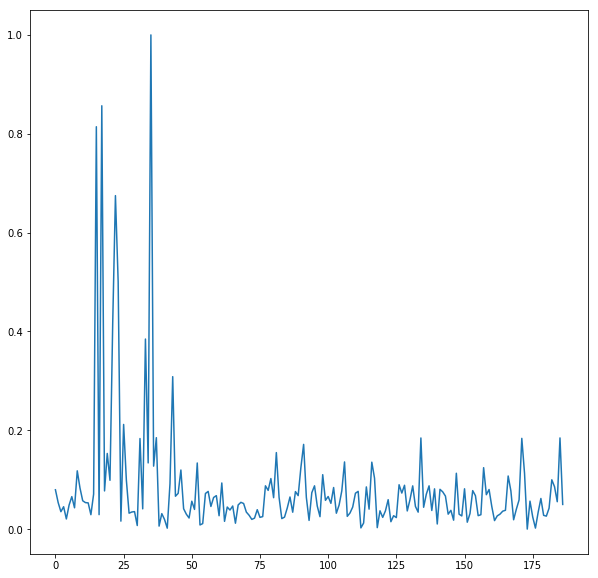

In [94]:
plt.figure(figsize=(10,10))
plt.plot(train)

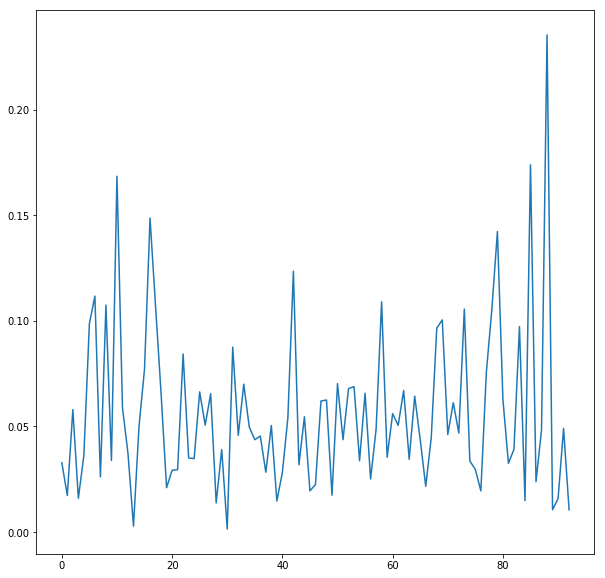

In [93]:
plt.figure(figsize=(10,10))
plt.plot(test)

In [69]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [70]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [77]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(1000):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
 - 2s - loss: 0.0162
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0162
Epoch 1/1
 - 1s - loss: 0.0162
Epoch 1/1
 - 1s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 1s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 1s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/

 - 1s - loss: 0.0133
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0130
Epoch 1/1
 - 1s - loss: 0.0130
Epoch 1/1
 - 1s - loss: 0.0130
Epoch 1/1
 - 1s - loss: 0.0129
Epoch 1/1
 - 1s - loss: 0.0129
Epoch 1/1
 - 1s - loss: 0.0129
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0126
Epoch 1/1
 - 1s - loss: 0.0126
Epoch 1/1
 - 1s - loss: 0.0126
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0124
Epoch 1/1
 - 1s - loss: 0.0124
Epoch 1/1
 - 1s - 

Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/

 - 0s - loss: 0.0067
Epoch 1/1
 - 0s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0067
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0099
Epoch 1/1
 - 1s - loss: 0.0074
Epoch 1/1
 - 1s - loss: 0.0152
Epoch 1/1
 - 0s - loss: 0.0068
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0058
Epoch 1/1
 - 1s - loss: 0.0058
Epoch 1/1
 - 1s - loss: 0.0058
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - 

In [78]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [79]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [80]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


In [81]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [82]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

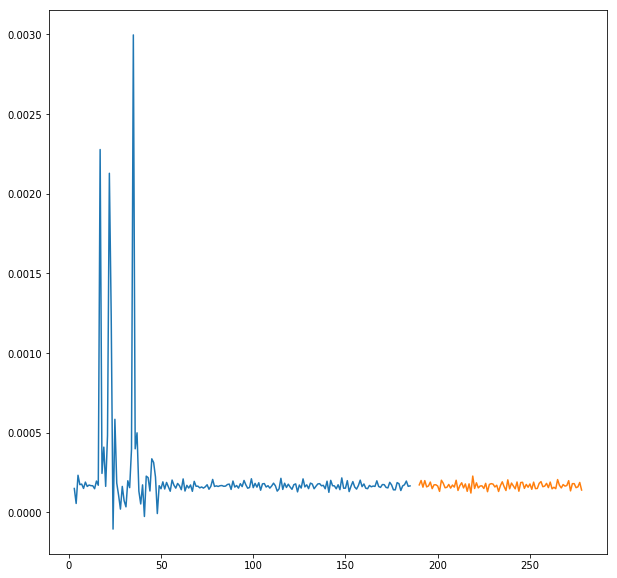

In [92]:
# plot baseline and predictions
plt.figure(figsize=(10,10))
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()